In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import joblib
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, precision_score, recall_score, f1_score, roc_auc_score, precision_recall_curve, average_precision_score

## Chargement du dataset

In [24]:
# Chargement
df = pd.read_csv('df_clean.csv')

In [25]:
# Encodage de la variable cible
df["Patient's Vital Status"] = df["Patient's Vital Status"].map({"Dead":1, "Alive":0})
df = df.dropna(subset=["Patient's Vital Status"])

In [26]:
# Split stratifié
X = df.drop(columns=["Patient's Vital Status"])
y = df["Patient's Vital Status"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [27]:
# Conversion des booléens en str pour OneHot
for col in X_train.select_dtypes(include="bool").columns:
    X_train[col] = X_train[col].astype(str)
    X_test[col] = X_test[col].astype(str)

print("OK — X_test est prêt :", X_test.shape) # 38 patients et 7 variables

OK — X_test est prêt : (38, 5)


# petit jeu de test : 38 lignes et 5 features

In [28]:
# Charger le meilleur modèle
best_model = joblib.load("data/processed/best_model.pkl")

In [29]:
# Prédictions
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:,1]

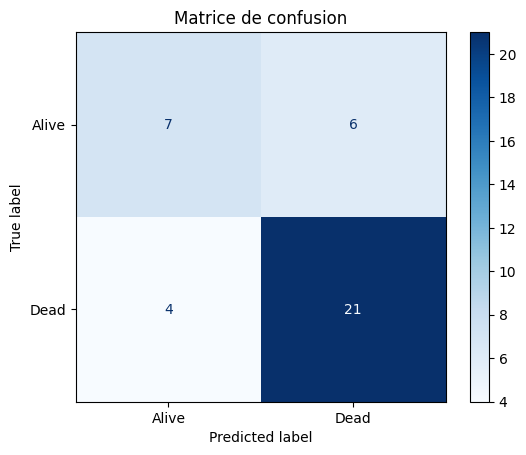

In [30]:
# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=["Alive","Dead"])
disp.plot(cmap="Blues")
plt.title("Matrice de confusion")
plt.show()

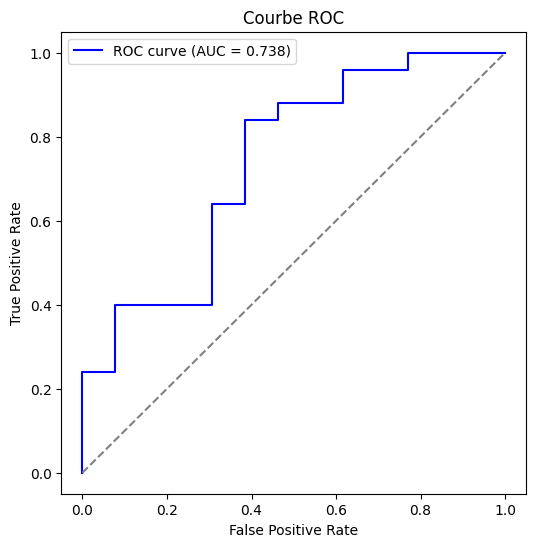

In [31]:
# Courbe ROC
auc = roc_auc_score(y_test, y_proba)
fpr, tpr, _ = roc_curve(y_test, y_proba)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc:.3f})')
plt.plot([0,1], [0,1], color='grey', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Courbe ROC")
plt.legend()
plt.show()

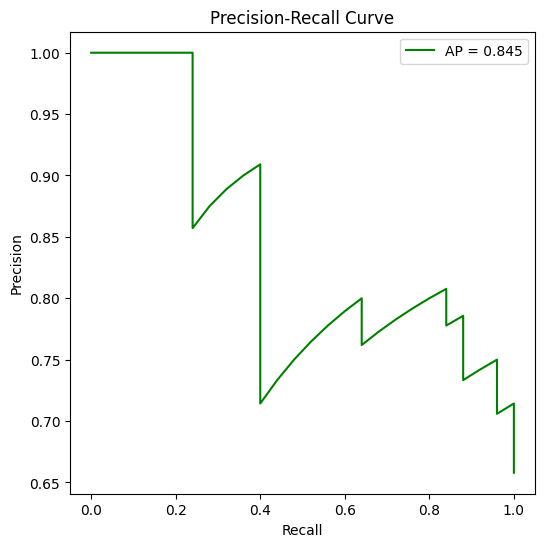

In [32]:
# Courbe Precision-Recall
precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_proba)
ap = average_precision_score(y_test, y_proba)

plt.figure(figsize=(6,6))
plt.plot(recall_vals, precision_vals, color='green', label=f'AP = {ap:.3f}')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

In [33]:
# Métriques supplémentaires
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.3f}, Recall: {recall:.3f}, F1: {f1:.3f}, AUC: {auc:.3f}")

Precision: 0.778, Recall: 0.840, F1: 0.808, AUC: 0.738


Recall = 0.840 → le modèle identifie 84 % des vrais positifs.
Precision = 0.778 → parmi les prédictions positives, 22 % sont des faux positifs (un peu de bruit).
F1 = 0.808 → c’est un très bon équilibre.
AUC = 0.738 → le modèle distingue bien les positifs et négatifs, mais ce n’est pas parfait.

Le modèle XGBoost présente un bon compromis entre détection des positifs et précision des prédictions.
Avec un recall de 84 %, il identifie la majorité des cas positifs, tout en conservant une précision de 77,8 %.
L’AUC de 0,738 confirme que le modèle sépare bien les classes.
Le F1-score de 0,808 reflète cet équilibre global.

Conclusion Notebook 4
Le pipeline sauvegardé (best_model.pkl) a été évalué sur le jeu de test.

Métriques clés : AUC = 0.738, Precision = 0.778, Recall = 0.840, F1 = 0.808.

La matrice de confusion montre que le modèle classe correctement la majorité des patients décédés, mais quelques patients vivants sont mal classés.

Courbes ROC et Precision-Recall confirment que le modèle est performant pour la détection des décès, ce qui est crucial en contexte clinique.

Les résultats sont reproductibles et prêts pour une interprétation plus poussée (SHAP, importance des variables)